## Author: Paweł Jelonek <br> Date: 11.04.2021
### Machine learning course:<br> Lecture 2 - Data analysis, recognition and preparation.

In [18]:
import pandas as pd
import numpy as np
import string
import datetime
import statistics
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=(20, 10)

### 1.  Please download any dataset <br>
Trump tweets: https://www.kaggle.com/austinreese/trump-tweets

In [9]:
trump_tweets_df = pd.read_csv('C:/Users/pawst/OneDrive/Github/machine_learning_course/Lecture 2 - Data analysis, recognition and preparation/Lab4/trumptweets.csv')

### 2.	Identify the research motivation of the dataset:
    - field: Classification
    - problem: Get specific information based on Donald Trump tweets over a period of time.
    - type of ML: Classification

### 3.  Visualize the feature distributions by using histograms, spread distributions, or other plots.

In [10]:
trump_tweets_df.head()

,id,link,content,date,retweets,favorites,mentions,hashtags,geo
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN
2,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18,NaN,NaN,NaN
3,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24,NaN,NaN,NaN
4,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965,NaN,NaN,NaN


### </br><center>Lets first see histograms about retweets and favourites sections over a period of time.</center></br>

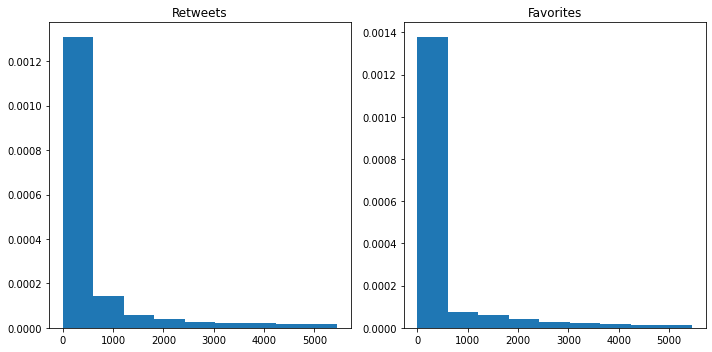

In [42]:
size = 10
binsRetweets = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
binsFavorites = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].hist(trump_tweets_df['retweets'], density=True, bins=binsRetweets)
axs[0].title.set_text('Retweets')

axs[1].hist(trump_tweets_df['favorites'], density=True, bins=binsFavorites)
axs[1].title.set_text('Favorites')

plt.show()

### </br><center>Lets see plots about retweets and favourites sections over a period of time.</center></br>

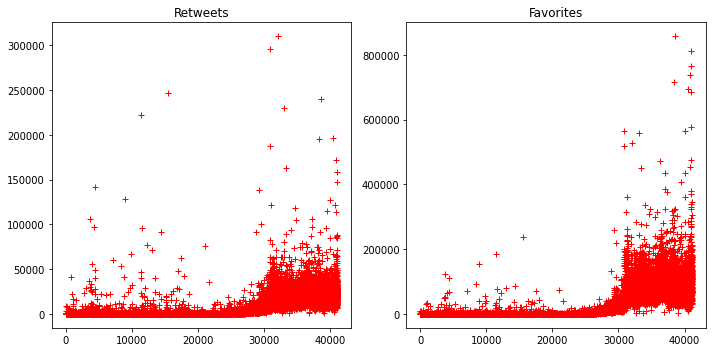

In [44]:
size = 10
binsRetweets = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
binsFavorites = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].plot(trump_tweets_df['retweets'], "r+")
axs[0].title.set_text('Retweets')

axs[1].plot(trump_tweets_df['favorites'], "r+")
axs[1].title.set_text('Favorites')

plt.show()

### 4.	Określić wartości odstające (outliers).

In [48]:
# type(trump_tweets_df['retweets'])
def calculate_outliers_by_mean_value(data: pd.Series):
    return statistics.mean(data)

AttributeError: 'Line2D' object has no property 'size'

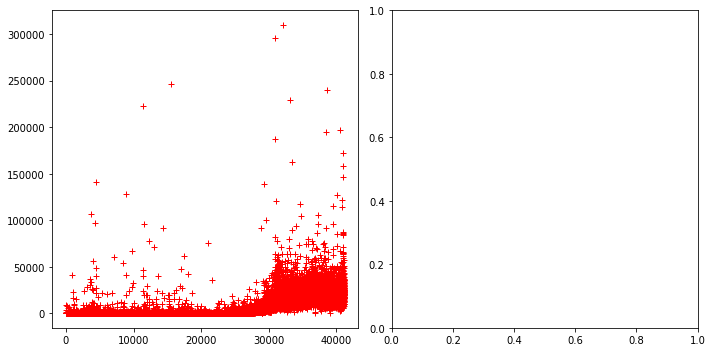

In [55]:
size = 10
binsRetweets = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
binsFavorites = np.linspace(0, statistics.mean(trump_tweets_df['retweets']), size)
fig, axs = plt.subplots(1, 2, figsize=(10, 5), tight_layout=True)

axs[0].plot(trump_tweets_df['retweets'], "r+")
axs[0].plot(calculate_outliers_by_mean_value(trump_tweets_df['retweets']), "b+")
axs[0].title.set_text('Retweets')

axs[1].plot(trump_tweets_df['favorites'], "r+")
axs[1].title.set_text('Favorites')

plt.show()

For the purpose of our motivation we do not need columns:
    - mentions
    - hashtags
    - geo
as they not only contain NaN values, but they are not related to the topic.

'link' column is also not needed as it has no usage here.

In [4]:
def get_all_nan_with_column_name(column_name: string, dataframe: pd.DataFrame):
    return len(dataframe.loc[pd.isna(dataframe[column_name]) == True])

In [5]:
all_rows_from_df = len(trump_tweets_df)
all_nan_mentions = get_all_nan_with_column_name('mentions', trump_tweets_df)
all_nan_geo = get_all_nan_with_column_name('geo', trump_tweets_df)
all_nan_hashtags = get_all_nan_with_column_name('hashtags', trump_tweets_df)

print(f'Percentage of all NaN cells in column mentions is {(all_nan_mentions/all_rows_from_df)*100:.5} %')
print(f'Percentage of all NaN cells in column geo is {(all_nan_geo/all_rows_from_df)*100:.5} %')
print(f'Percentage of all NaN cells in column hashtags is {(all_nan_hashtags/all_rows_from_df)*100:.5} %')

del trump_tweets_df['mentions']
del trump_tweets_df['geo']
del trump_tweets_df['hashtags']

del trump_tweets_df['link']

print("\n\nNew dataset:")
trump_tweets_df.head()

Percentage of all NaN cells in column mentions is 45.365 %
Percentage of all NaN cells in column geo is 100.0 %
Percentage of all NaN cells in column hashtags is 85.871 %


New dataset:


,id,content,date,retweets,favorites
0,1698308935,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868
1,1701461182,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273
2,1737479987,Donald Trump reads Top Ten Financial Tips on L...,2009-05-08 15:38:08,12,18
3,1741160716,New Blog Post: Celebrity Apprentice Finale and...,2009-05-08 22:40:15,11,24
4,1773561338,"""My persona will never be that of a wallflower...",2009-05-12 16:07:28,1399,1965


I would like also to clear date column from time.

In [6]:
trump_tweets_df['date'] = trump_tweets_df['date'].map(lambda x: x[:-9])

8.	W oparciu o powyższe wybrać do uczenia: określone klasy przypadków, wybrane cechy, oraz liczbę rekordów
 danych (wszystkie?). Przygotowany zbiór zapisać.

9.	Proszę pobrać zbiór danych, w którym są wartości brakujące (NaN/0/-/(puste miejsce)) lub usunąć ze zbioru danych
losowo pewną liczbę komórek.
    -	Wyznaczyć statystykę braków i ocenić jak ten problem rozwiązać.
    -	Obsłużyć wartości brakujące za pomocą usunięcia rekordów.
    -	Obsłużyć wartości brakujące wypełniając je zerem/inną wartością stałą.
    -	Obsłużyć wartości brakujące wypełniając wartością średnią cechy (wartości ciągłe) lub medianą (wartości dyskretne).


10.	Przeprowadzić
    -	skalowanie każdej cechy w zadanym przedziale (domyślnie [-1,1]),
    -	normalizację każdej cechy (do rozkładu Gaussa N(0,1)).

11.	Zakodować etykiety klas
    -	problemy binarne: 0/1, -1/1,
    -	problemy wieloklasowe: kolejne cyfry, one-hot encoding.

